In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')


In [2]:
# Load data
df = pd.read_csv('../data/compression.csv')
df_plain_run = pd.read_csv('../data/plain_run.csv')
df_jpeg = pd.read_csv('../data/jpeg.csv')

# _x = compression, _y = jpeg, rest = plain run
df_merged = pd.merge(pd.merge(df, df_jpeg, on='file_name'), df_plain_run, on='file_name')

df_merged


,file_name,file_size_original_x,file_size_transcoded_x,compression_ratio_x,transcoding_time_x,archive_format,file_size_original_y,file_size_transcoded_y,compression_ratio_y,transcoding_time_y,file_size_original,file_size_transcoded,compression_ratio,transcoding_time
0,test_fine_print,30956,546,0.017638,224,gzip,30956,67485,2.180030,31,30956,659,0.021288,235
1,test_fine_print,30956,659,0.021288,221,zip,30956,67485,2.180030,31,30956,659,0.021288,235
2,test_small,974331,441082,0.452702,793,gzip,974331,155999,0.160109,59,974331,4533948,4.653396,1411
3,test_small,974331,4533948,4.653396,1380,zip,974331,155999,0.160109,59,974331,4533948,4.653396,1411
4,test_pixel,7649,5328,0.696562,77,gzip,7649,3804,0.497320,22,7649,68090,8.901817,94
5,test_pixel,7649,68090,8.901817,87,zip,7649,3804,0.497320,22,7649,68090,8.901817,94
6,test_gradient,142670,36116,0.253144,83,zip,142670,18179,0.127420,32,142670,36116,0.253144,85
7,test_gradient,142670,4138,0.029004,79,gzip,142670,18179,0.127420,32,142670,36116,0.253144,85
8,test_detail_high,785610,364100,0.463462,668,gzip,785610,131051,0.166814,57,785610,3602062,4.585051,1169
9,test_detail_high,785610,3602062,4.585051,1163,zip,785610,131051,0.166814,57,785610,3602062,4.585051,1169


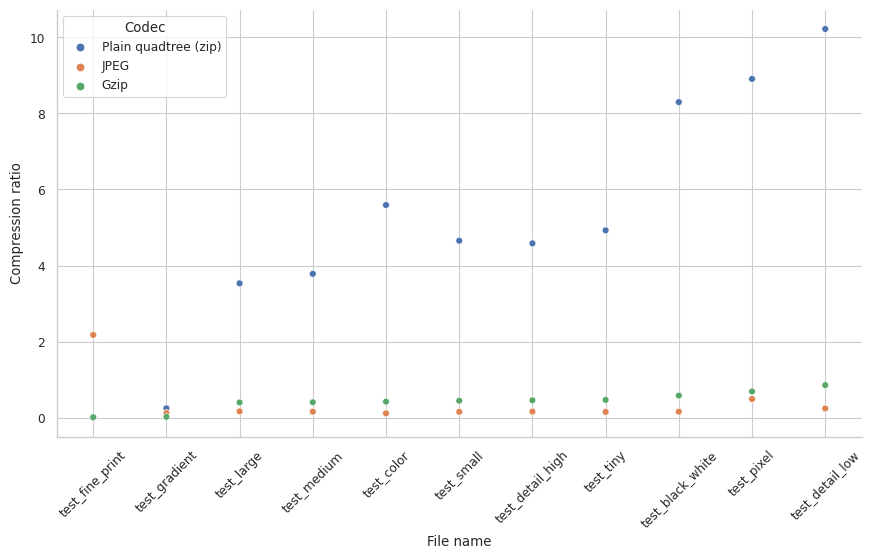

In [7]:
# Compression ratio
df_sorted = df_merged.sort_values('compression_ratio_x')

df_first = df_sorted.loc[:, ('file_name', 'compression_ratio')].rename(
    columns={'compression_ratio': 'c'})
df_first['class'] = 'plain_run'

df_second = df_sorted.loc[:, ('file_name', 'compression_ratio_y')].rename(
    columns={'compression_ratio_y': 'c'})
df_second['class'] = 'jpeg'

# Do this hacky filtering, as the zip data is already included in df_first and I want the zip data to have the first hue on the graph
df_third = df_sorted[df_sorted['archive_format'] == 'gzip'].loc[:, ('file_name', 'compression_ratio_x', 'archive_format')].rename(
    columns={'compression_ratio_x': 'c', 'archive_format': 'class'})

# Concatenate data frames
df_concat = pd.concat([df_first, df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='c',
    data=df_concat,
    hue='class',
    aspect=16/9,
    facet_kws={'legend_out': False},
)

g.set(xlabel='File name', ylabel='Compression ratio')

legend = g.axes.flat[0].get_legend()
legend.set_title('Codec')
for t, l in zip(legend.texts, ['Plain quadtree (zip)', 'JPEG', 'Gzip']):
    t.set_text(l)

plt.xticks(rotation=45)

plt.show()


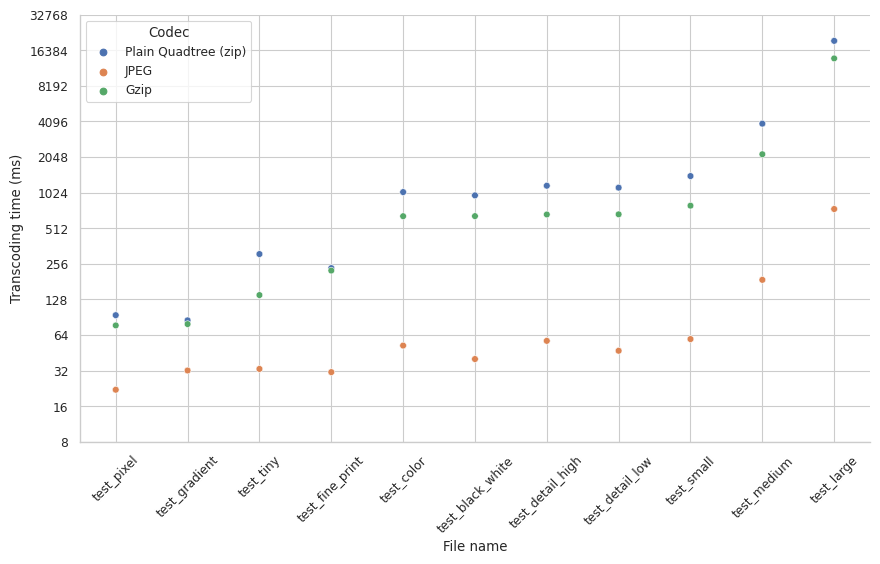

In [8]:
# Transcoding time
df_sorted = df_merged.sort_values('transcoding_time_x')

df_first = df_sorted.loc[:, ('file_name', 'transcoding_time')].rename(
    columns={'transcoding_time': 't'})
df_first['class'] = 'plain_run'

df_second = df_sorted.loc[:, ('file_name', 'transcoding_time_y')].rename(
    columns={'transcoding_time_y': 't'})
df_second['class'] = 'jpeg'

df_third = df_sorted[df_sorted['archive_format'] == 'gzip'].loc[:, ('file_name', 'transcoding_time_x', 'archive_format')].rename(
    columns={'transcoding_time_x': 't', 'archive_format': 'class'})

# Concatenate data frames
df_concat = pd.concat([df_first, df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='t',
    hue='class',
    data=df_concat,
    aspect=16/9,
    facet_kws={'legend_out': False},
)

legend = g.axes.flat[0].get_legend()
legend.set_title('Codec')
for t, l in zip(legend.texts, ['Plain Quadtree (zip)', 'JPEG', 'Gzip']):
    t.set_text(l)

ticks = [2**x for x in range(3, 16)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log', yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()